# Transfer Learning

In [31]:
from keras.applications import VGG16

In [32]:
# Load the convolutional base from imagenet
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64,64,3))

In [3]:
#conv_base.summary()

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [5]:
# train_dir = 'images/training'
# validation_dir = 'images/testing'

train_dir = 'SMILE_Dataset/train/'
validation_dir = 'SMILE_Dataset/test/'

In [6]:
datagen = ImageDataGenerator(rescale=1./255)  # Rescale images to 0-1
batch_size = 32  # Number of batches to read from default 32

In [7]:
def extract_features(directory, sample_count):
    """
    extract the features when processing images through the convolutional base. The features will be fed to 
    classification neural network
    """
    # Create emtpy array
    features = np.zeros(shape=(sample_count, 2, 2, 512))
    # Here I added the shape 
    labels = np.zeros(shape=(sample_count,2))
    # define the generator that is going to grab 20 images at a time and loop infinitly.
    generator = datagen.flow_from_directory(
        directory,
        target_size=(64,64),
        batch_size=batch_size,
        class_mode='categorical'
        )
    # Usefull for mapping label names
    label_map = (generator.class_indices)
    i=0
    
    # Extract features
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        # Break because the generator will loop infinitly
        if i * batch_size >= sample_count:
            break
    return features, labels, label_map

In [11]:
total_training = 0
for folder in os.listdir("images/testing"):
    total_training += len(os.listdir( os.path.join('images/testing',folder)))
    print(len(os.listdir( os.path.join('images/testing',folder))))
print(total_training)

100
100
200


In [27]:
train_features, train_labels, label_map = extract_features(train_dir, 320)
validation_features, validation_labels, label_map = extract_features(validation_dir, 80)

Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [28]:
train_features.shape

(320, 2, 2, 512)

In [29]:
train_features = np.reshape(train_features, (320, 2 * 2 * 512))
validation_features = np.reshape(validation_features, (80, 2 * 2 * 512))

In [30]:
train_features.shape

(320, 2048)

In [11]:
label_map2 = label_map

WE have transferer learned, now lets take this and feed it as input to our classification model.


In [12]:
from keras import models
from keras import layers
from keras import optimizers

In [13]:
model = models.Sequential()

model.add(layers.Dense(256, activation='relu', input_dim= 2 * 2 * 512))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))


model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(train_features, train_labels,
                   epochs = 150,
                   batch_size = 32,
                   validation_data=(validation_features, validation_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 320 samples, validate on 80 samples
Epoch 1/150
320/320 [==============================] - 0s 2ms/step - loss: 0.9090 - acc: 0.5312 - val_loss: 0.6782 - val_acc: 0.5000
Epoch 2/150
320/320 [==============================] - 0s 474us/step - loss: 0.8665 - acc: 0.5437 - val_loss: 0.6492 - val_acc: 0.5000
Epoch 3/150
320/320 [==============================] - 0s 439us/step - loss: 0.8548 - acc: 0.5312 - val_loss: 0.6285 - val_acc: 0.5375
Epoch 4/150
320/320 [==============================] - 0s 496us/step - loss: 0.7510 - acc: 0.5469 - val_loss: 0.6100 - val_acc: 0.6375
Epoch 5/150
320/320 [==============================] - 0s 411us/step - loss: 0.7656 - acc: 0.5719 - val_loss: 0.5955 - val_acc: 0.6500
Epoch 6/150
320/320 [==============================] - 0s 471us/step - loss: 0.7537 - acc: 0.6156 - val_loss: 0.5786 - val_acc: 0.7750
Epoch 7/150
320/320 [==============================] 

320/320 [==============================] - 0s 564us/step - loss: 0.2367 - acc: 0.9094 - val_loss: 0.3407 - val_acc: 0.8250
Epoch 59/150
320/320 [==============================] - 0s 499us/step - loss: 0.2522 - acc: 0.9031 - val_loss: 0.3452 - val_acc: 0.8125
Epoch 60/150
320/320 [==============================] - 0s 421us/step - loss: 0.2327 - acc: 0.9156 - val_loss: 0.3287 - val_acc: 0.8375
Epoch 61/150
320/320 [==============================] - 0s 592us/step - loss: 0.2172 - acc: 0.9250 - val_loss: 0.3316 - val_acc: 0.8375
Epoch 62/150
320/320 [==============================] - 0s 424us/step - loss: 0.2393 - acc: 0.8938 - val_loss: 0.3288 - val_acc: 0.8500
Epoch 63/150
320/320 [==============================] - 0s 439us/step - loss: 0.2572 - acc: 0.9000 - val_loss: 0.3264 - val_acc: 0.8625
Epoch 64/150
320/320 [==============================] - 0s 402us/step - loss: 0.2326 - acc: 0.9312 - val_loss: 0.3263 - val_acc: 0.8625
Epoch 65/150
320/320 [==============================] - 0s 38

320/320 [==============================] - 0s 415us/step - loss: 0.1528 - acc: 0.9469 - val_loss: 0.3119 - val_acc: 0.8625
Epoch 119/150
320/320 [==============================] - 0s 430us/step - loss: 0.1536 - acc: 0.9375 - val_loss: 0.3198 - val_acc: 0.8625
Epoch 120/150
320/320 [==============================] - 0s 411us/step - loss: 0.1484 - acc: 0.9438 - val_loss: 0.3232 - val_acc: 0.8625
Epoch 121/150
320/320 [==============================] - 0s 446us/step - loss: 0.1294 - acc: 0.9469 - val_loss: 0.3191 - val_acc: 0.8625
Epoch 122/150
320/320 [==============================] - 0s 405us/step - loss: 0.1397 - acc: 0.9594 - val_loss: 0.3174 - val_acc: 0.8625
Epoch 123/150
320/320 [==============================] - 0s 380us/step - loss: 0.1444 - acc: 0.9531 - val_loss: 0.3097 - val_acc: 0.8625
Epoch 124/150
320/320 [==============================] - 0s 411us/step - loss: 0.1292 - acc: 0.9531 - val_loss: 0.3208 - val_acc: 0.8625
Epoch 125/150
320/320 [==============================] 

In [18]:
from sklearn.metrics import classification_report

y_true = [0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 0, 1]
labels = ['no_smile','smile']

print(classification_report(y_true, y_pred, target_names=labels))

              precision    recall  f1-score   support

    no_smile       0.67      1.00      0.80         2
       smile       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.plot()

[]

## Let's try it out with our own image!

In [19]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [33]:
label_map2

{'non_smile': 0, 'smile': 1}

In [21]:
def return_class(numeric_id):
    for class_pred, id_class in label_map2.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
        if id_class == numeric_id:
            return class_pred

In [25]:
def return_prediction(img_src,img_src_name):
    test_features, test_labels, label_map = extract_features(img_src, 1)
    test_features = np.reshape(test_features, (1, 2 * 2 * 512))
    class_id = return_class(model.predict_classes(test_features)[0])
    
    img = image.load_img(img_src_name, target_size=(64, 64))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.

    plt.imshow(x[0])                           
    plt.axis('off')
    plt.title(class_id)
    plt.show()

Found 1 images belonging to 1 classes.


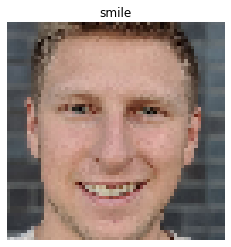

In [35]:
return_prediction('images/unique_test','images/unique_test/class/justin_smile.jpg')